<a href="https://colab.research.google.com/github/npipal/food-sales-predictions/blob/main/Final_Food_Sales_Predictions_NickPipal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##**Project 1 - Part 2**

## 1. How many rows and columns?

In [64]:
df.shape

(8523, 12)

## 2. What are the datatypes of each variable?

In [65]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## 3. Are there duplicates? If so, drop any duplicates.

In [66]:
df.duplicated().sum()

0

## 4. Identify missing values.

In [67]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## 5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

**Addresing missing values for Outlet_Size**

In [68]:
#Filling any missing data with 'NOTGIVEN'
df['Outlet_Size'].fillna('NOTGIVEN', inplace = True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Adressing missing values for Item_Weight**

In [69]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [70]:
#Fill in any missing data with the mean
df['Item_Weight'].fillna(round(df['Item_Weight'].mean(),2), inplace = True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 6. Confirm that there are no missing values after addressing them.

In [71]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 7. Find and fix any inconsistent categories of data(example: fix cat, Cat, and cats so that they are consistent)

In [72]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [73]:
#replacing inconsistent values to clean up the data in Item_Fat_Content
df.replace(['LF', 'low fat'], ['Low Fat', 'Low Fat'], inplace = True)
df.replace(['reg'], ['Regular'], inplace = True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## 8. For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [74]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.858049,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.860000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#**Project 1 - Part 3**

## 1. Histogram to view the distributions of various features in your dataset.

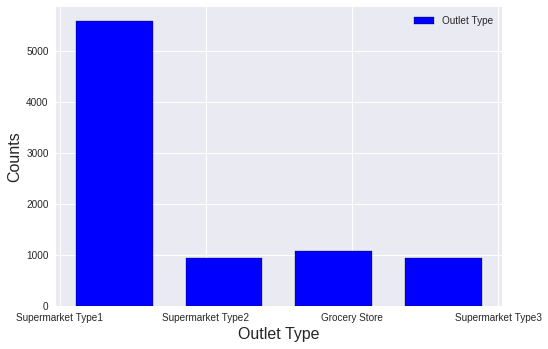

In [75]:
#Histogram of Outlet Type
plt.style.use('seaborn')
df['Outlet_Type'].hist(bins =4, label='Outlet Type', edgecolor='black', rwidth=0.7, color='blue')
plt.xlabel('Outlet Type', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.legend();

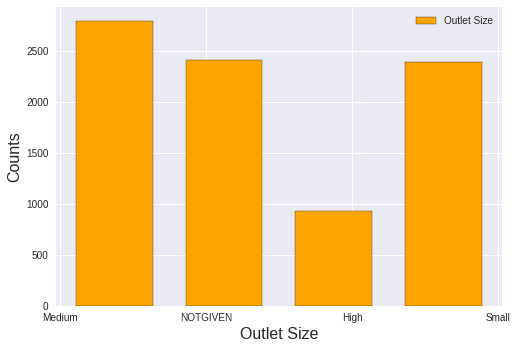

In [76]:
#Histogram of Outlet Size
plt.style.use('seaborn')
df['Outlet_Size'].hist(bins =4, label='Outlet Size', edgecolor='black', rwidth=0.7, color='orange')
plt.xlabel('Outlet Size', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.legend();

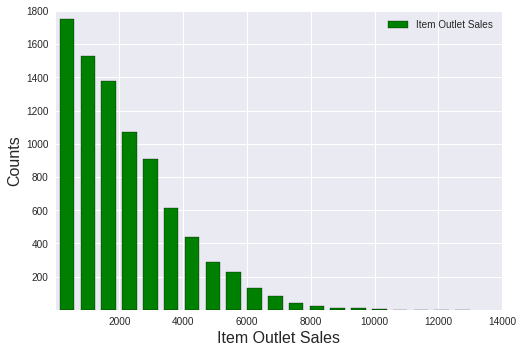

In [77]:
#Histogram of Item Outlet Sales
plt.style.use('seaborn')
df['Item_Outlet_Sales'].hist(bins=20, label='Item Outlet Sales', edgecolor='black', rwidth=0.7, color='green')
plt.xlabel('Item Outlet Sales', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.xlim(1,14000)
plt.ylim(1,1800)
plt.legend();

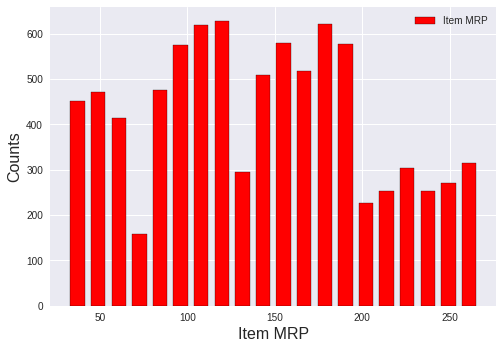

In [78]:
#Histogram of Item MRP
plt.style.use('seaborn')
df['Item_MRP'].hist(bins=20, label='Item MRP', edgecolor='black', rwidth=0.7, color='red')
plt.xlabel('Item MRP', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.legend();

##2. Boxplot to view statistical summaries of various features in your dataset.

Text(0.5, 1.0, 'Item Outlet Sales')

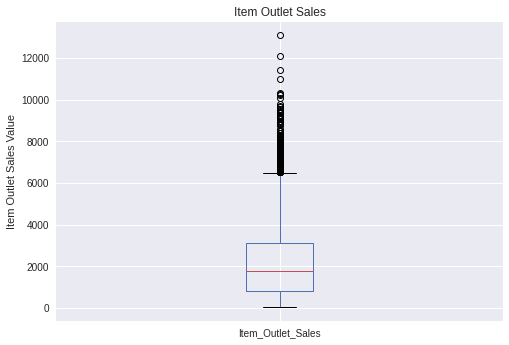

In [79]:
#Item Outlet Sales boxplot lots of outliers
df.boxplot('Item_Outlet_Sales');
plt.ylabel('Item Outlet Sales Value')
plt.title('Item Outlet Sales')

Text(0.5, 1.0, 'Item MRP Sales')

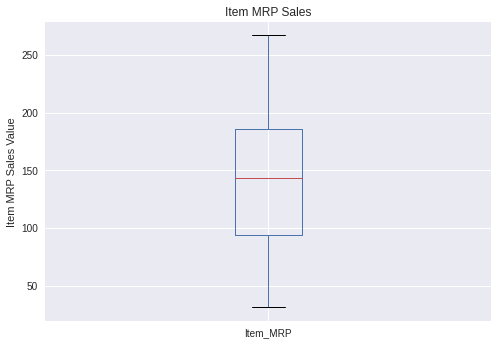

In [80]:
#Item MRP boxplot
df.boxplot('Item_MRP');
plt.ylabel('Item MRP Sales Value')
plt.title('Item MRP Sales')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text major ticklabel objects>)

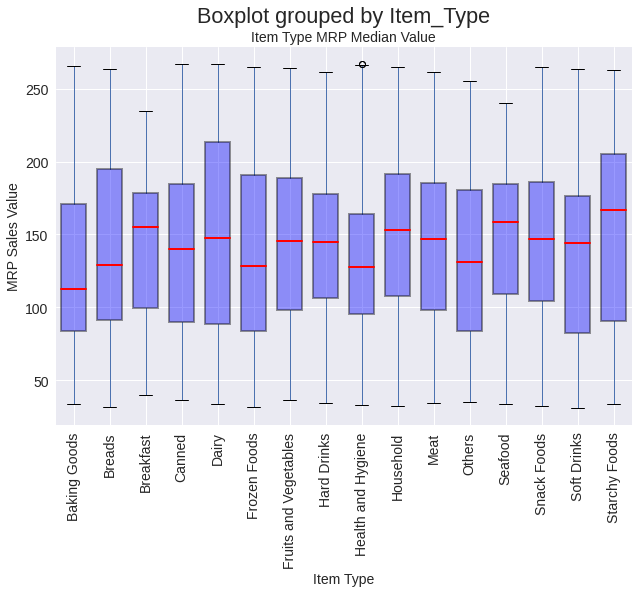

In [127]:
plt.style.use('seaborn')
df.boxplot(by='Item_Type', column='Item_MRP', figsize=(10,7), widths=.7, patch_artist=True,
           medianprops=dict(linestyle='-', linewidth=2, color='red'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
           );
plt.ylabel('MRP Sales Value', fontsize=14)
plt.xlabel('Item Type', fontsize=14)
plt.title('Item Type MRP Median Value', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(rotation=90)

## 3. Heatmap of the correlation between features.

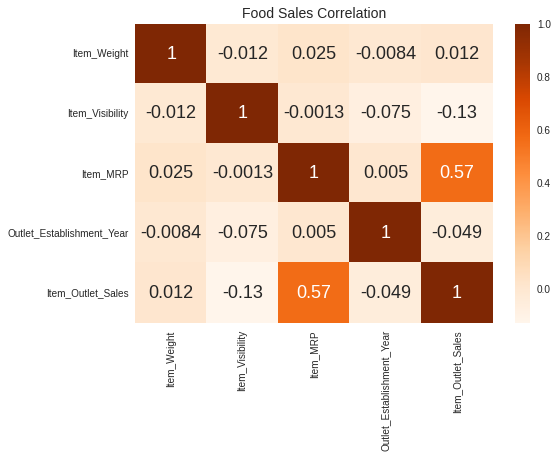

In [82]:
sns.heatmap(df.corr(), cmap = 'Oranges', annot= True).set_title('Food Sales Correlation', fontsize=14);

#H1 Project 1 Part 4 Explanatory Data Analysis

- Build on your previous cleaning, exploration, and analysis.  

- Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).

- Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

In [83]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

##H2 Does Outlet Size or Outlet Type effect the number of sales at a store? 

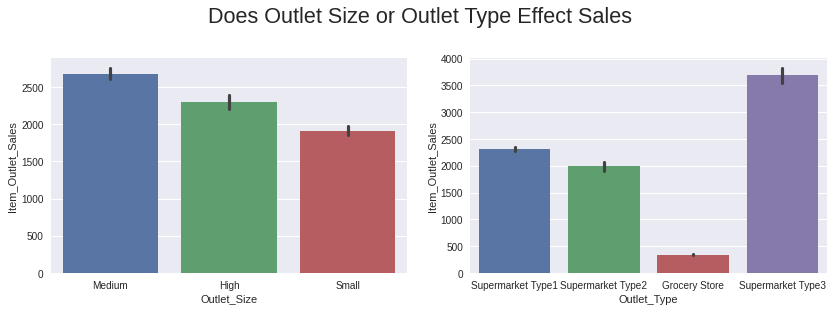

In [140]:
 fig, axes= plt.subplots(ncols=2, figsize=(12,4))
sns.barplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales', ax=axes[0])
sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', ax=axes[1])

fig.suptitle('Does Outlet Size or Outlet Type Effect Sales', y=1.1)
plt.tight_layout()

It appears that Location type does have an impact on Outlet Sales as Tier 2 and Tier 3 Locations have higher sales than Tier 1. Outlet type does have a impact on sales as Supermarket Types 1, 2, and 3 all have higher sales than does a Grocery Store. 



##H3 What kind of correlation does Item MRP and Item Outlet Sales have? 

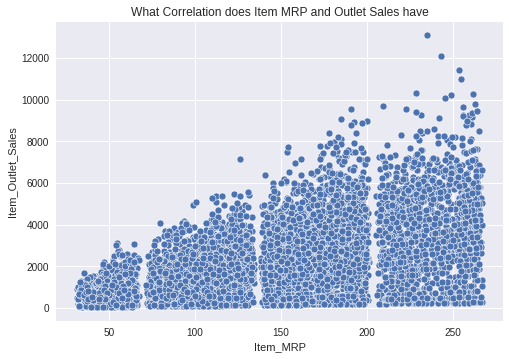

In [143]:
sns.scatterplot(data=df, x = "Item_MRP", y = "Item_Outlet_Sales").set(title="What Correlation does Item MRP and Outlet Sales have");

Item MRP (Maximum Retail Price) does have a positive correlation with Item Sales in that the higher the MRP the more items are being sold as shown by the Scatter Plot. 

##H4 Does Item Type have an impact on Items?

In [86]:
sns.set_context('talk')

In [87]:
groupby_ItemType = df.groupby('Item_Type').mean()

Text(0.5, 1.0, 'Total Item Sales by Type')

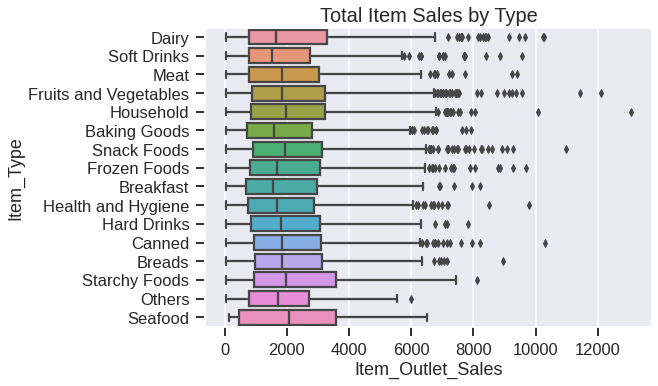

In [88]:
ax = sns.boxplot(data=df, x = 'Item_Outlet_Sales', y='Item_Type')
ax.set_title('Total Item Sales by Type', fontsize=20)

The 25th Quartile, Median, 75th Quartile, and Max for every Item Type is very similar in value. There are a good amount of outliers in this given plot that range from about 6000-13500 depending on the Maximum of the Item Type. 

##H5 How does Item Visibility and Outlet Size Effect Sales

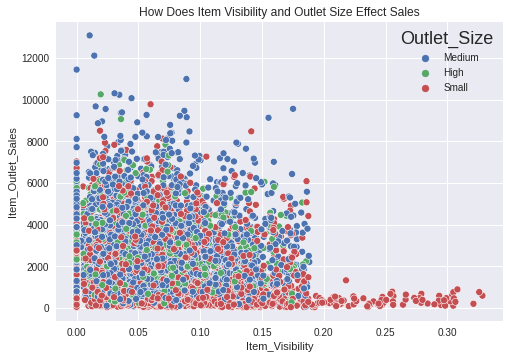

In [135]:
sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue = 'Outlet_Size').set(title='How Does Item Visibility and Outlet Size Effect Sales');

##H6 How Does Item Visibility and Outlet Type Effect Sales

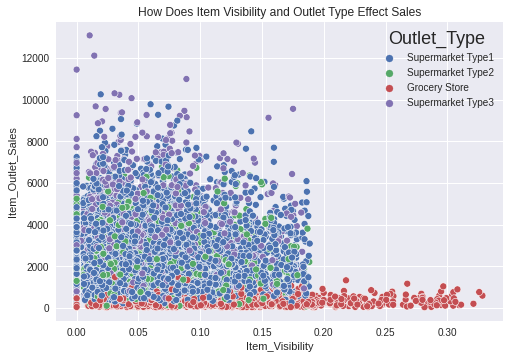

In [138]:
sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue = 'Outlet_Type').set(title="How Does Item Visibility and Outlet Type Effect Sales");

#H1 Project 1 Part 5

In [89]:
path = '/content/sales_predictions.csv'
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [90]:
#inspect data
print(df.info(), '\n')
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None 

Item_Identifier                 0
Item

In [91]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [92]:
df['Item_Fat_Content'].replace({"LF": "Low Fat", "reg": "Regular","low fat":"Low Fat"}, inplace=True)

In [93]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [94]:
df['Item_Fat_Content'].replace({'Low Fat':0, 'Regular':1}, inplace=True)

In [95]:
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

## 1. Identify the target (y) and features (X): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  

In [96]:
y = df['Item_Outlet_Sales']
X= df.drop(columns= ['Item_Outlet_Sales', 'Item_Identifier'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

##2. Create a pre processing pipeline to prepare the dataset for Machine Learning

In [97]:
# instantiate imputer and scaler
mean_imputer = SimpleImputer(strategy='mean')
constant_imputer = SimpleImputer(strategy='constant', fill_value = 'NOTGIVEN')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [98]:
# Numeric pipeline
numeric_pipe=make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [99]:
# Categorical pipeline
categorical_pipe=make_pipeline(constant_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NOTGIVEN', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [100]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder= 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f812dcc5fd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NOTGIVEN',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f812dc63d90>)])

In [101]:
#fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f812dcc5fd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NOTGIVEN',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f812dc63d90>)])

In [102]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [103]:
# Check for missing values and that numeric data is scaled and categorical data one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 42)




array([[ 0.81724868, -0.7403206 , -0.71277507, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 ,  1.35076614, -1.29105225, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.35076614,  1.81331864, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.7403206 , -0.92052713, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.7403206 , -0.2277552 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.7403206 , -0.95867683, ...,  1.        ,
         0.        ,  0.        ]])

In [104]:
X_test_df = pd.DataFrame(X_test_processed)
X_train_df = pd.DataFrame(X_train_processed)

In [105]:
X_train_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
count,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.0,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00
mean,0.00,-0.00,-0.00,0.00,-0.00,0.07,0.03,0.01,0.08,0.08,0.1,0.15,0.03,0.06,0.11,0.05,0.02,0.01,0.14,0.05,0.02,0.06,0.11,0.11,0.11,0.06,0.11,0.11,0.11,0.11,0.11,0.11,0.33,0.28,0.28,0.27,0.33,0.40,0.12,0.65,0.11,0.11
std,1.00,1.00,1.00,1.00,1.00,0.26,0.16,0.11,0.26,0.27,0.3,0.36,0.16,0.24,0.31,0.21,0.14,0.08,0.35,0.22,0.14,0.25,0.31,0.31,0.31,0.24,0.32,0.31,0.31,0.31,0.31,0.31,0.47,0.45,0.45,0.45,0.47,0.49,0.33,0.48,0.31,0.32
min,-1.98,-0.74,-1.29,-1.77,-1.53,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.81,-0.74,-0.76,-0.76,-1.29,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,-0.74,-0.23,0.03,0.14,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.76,1.35,0.56,0.72,0.73,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00
max,2.00,1.35,5.13,1.99,1.33,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [106]:
X_test_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
count,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.0,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.0,2131.0,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.0
mean,-0.04,-0.01,0.01,-0.06,-0.01,0.08,0.04,0.01,0.08,0.08,0.11,0.13,0.02,0.06,0.1,0.06,0.02,0.01,0.14,0.05,0.01,0.07,0.11,0.11,0.11,0.07,0.1,0.1,0.11,0.11,0.12,0.11,0.32,0.28,0.28,0.30,0.32,0.38,0.13,0.66,0.11,0.1
std,1.01,1.00,1.04,0.98,0.99,0.27,0.19,0.11,0.27,0.27,0.31,0.34,0.14,0.24,0.3,0.23,0.13,0.10,0.34,0.23,0.11,0.25,0.32,0.31,0.31,0.25,0.3,0.3,0.31,0.31,0.32,0.32,0.47,0.45,0.45,0.46,0.47,0.49,0.34,0.47,0.31,0.3
min,-1.97,-0.74,-1.29,-1.75,-1.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,-0.89,-0.74,-0.76,-0.78,-1.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
50%,0.00,-0.74,-0.24,-0.15,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0
75%,0.73,1.35,0.56,0.64,0.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.0
max,2.00,1.35,4.79,1.99,1.33,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0


#H1 Project 1 - Final (CORE)

## 1) Build a linear regression model to predict sales.

- Build a linear regression model.
- Evaluate the performance of your model based on r^2.
- Evaluate the performance of your model based on rmse.

In [107]:
# instantiating a baseline model using the 'mean' strategy
dummy=DummyRegressor(strategy='mean')

In [108]:
# putting ColumnTransformer and the baseline model into a pipeline
base_pipe = make_pipeline(preprocessor, dummy)

In [109]:
# fitting pipe onto the training data
base_pipe.fit(X_train_df, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f812dcc5fd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NOTGIVEN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f812dc63d90>)])),
                ('dummyregressor', DummyRegressor())])

In [110]:
# defining a function that takes true and predicted values as arguments
def eval_model(true, pred):
  mae= mean_absolute_error(true, pred)
  mse= mean_squared_error(true, pred)
  rmse=np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE: {mae:,.2f}, \n MSE: {mse:,.2f}, \n RMSE: {rmse:,.2f}, \n R2: {r2:,.2f} ')

In [111]:
# finding MAE, MSE, RMSE and R2 on the baseline model for both the train and test data
print('Train Evaluation')

eval_model(y_train, base_pipe.predict(X_train_processed))

print('\n Test Evaluation')

eval_model(y_test, base_pipe.predict(X_test_processed))

Train Evaluation
MAE: 1,360.22, 
 MSE: 2,959,455.70, 
 RMSE: 1,720.31, 
 R2: 0.00 

 Test Evaluation
MAE: 1,326.12, 
 MSE: 2,772,144.46, 
 RMSE: 1,664.98, 
 R2: -0.00 


In [112]:
# instantiateing a linear regression model
# Putting ColumnTransformer and linear regression model into a pipeline
# fitting pipe on the training data
linreg = make_pipeline(preprocessor, LinearRegression())
linreg.fit(X_train_df, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f812dcc5fd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NOTGIVEN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f812dc63d90>)])),
                ('linearregression', LinearRegression())])

In [113]:
# finding MAE, MSE, RMSE, and R2 of the linear regreesion model on both train and test data
print('Train Evaluation')

eval_model(y_train, linreg.predict(X_train_processed))

print('\n Test Evaluation')

eval_model(y_test, linreg.predict(X_test_processed))

Train Evaluation
MAE: 847.10, 
 MSE: 1,297,557.87, 
 RMSE: 1,139.10, 
 R2: 0.56 

 Test Evaluation
MAE: 804.09, 
 MSE: 1,194,341.74, 
 RMSE: 1,092.86, 
 R2: 0.57 


## 2) Your second task is to build a regression tree model to predict sales.

- Build a simple regression tree model.
- Compare the performance of your model based on r^2.
- Compare the performance of your model based on rmse.  

In [114]:
#Make Instance of Model
dec_tree = DecisionTreeRegressor(random_state=42)

In [115]:
#Learning the relationship between X and y
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [116]:
dectree_train_score = dec_tree.score(X_train_processed, y_train)
dectree_test_score = dec_tree.score(X_test_processed, y_test)
print(dectree_train_score)
print(dectree_test_score)

1.0
0.19631969766256696


In [117]:
#What is the depth of our tree?
dec_tree.get_depth()

40

In [118]:
# How many leaf nodes?
dec_tree.get_n_leaves()

6270

In [119]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 40)) # will try every value between 2 and 40
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

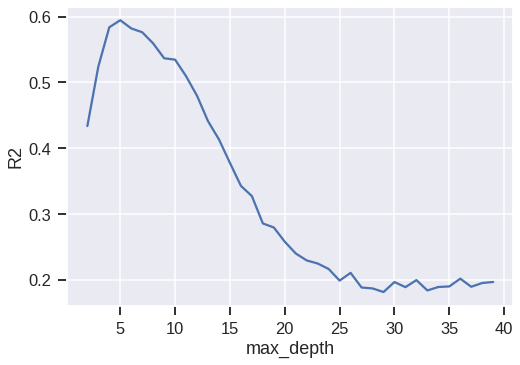

In [120]:
# Visualizing which max_depth leads to the highest r2 score
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

Looks like the best score for the model is when the parameter max_depth is 5. 

In [121]:
#Model with the max_depth set at 5
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_processed, y_train)
train_5_score = dec_tree_5.score(X_train_processed, y_train)
test_5_score = dec_tree_5.score(X_test_processed, y_test)
print(train_5_score)
print(test_5_score)

0.6039397477322956
0.5947099753159972


In [128]:
print("Training RMSE:",np.sqrt(mean_squared_error(y_train, dec_tree.predict(X_train_df))))

Training RMSE: 1.607581711641009


In [129]:
print("Testing RMSE:", np.sqrt(mean_squared_error(y_test, dec_tree.predict(X_test_df))))

Testing RMSE: 1488.802349560423


## 3) You now have tried 2 different models on your data set. You need to determine which model to implement.

- Overall, which model do you recommend?
- Justify your recommendation.

The model I would recommend is the Decision Tree Model.

Although there is a slight difference between the training and testing scores, the training score for the r2 value is slightly higher than the testing score which means that the data is was not overfit. 

The food sales prediction project consisted of using Python to build predictive models for Outlet Sales. Over the last 6 weeks this data was cleaned, organized, and analyzed to make sure of proper performance of the analytical process. Below you will find multiple different charts to help visualize the end products of different steps.

The different models that were used to review this information were a Linear Regression Model, and a Simple Decision Tree Model. Between those two models the one that performed the best was the Simple Decision Tree Model. At first glance when finding the r2 values it was 1.0 training score, and 0.19 testing score. But after manipulating the hyperparamters and finding out the best score for this model would be at a max depth of 5 there is a night and day difference. After setting the hyperparamters to a max depth of 5, there is a training score of 60% and a testing score of 59%. Although there is a slight difference between the training and testing scores, the training score for the r2 value is slightly higher than the testing score which means that the data was not overfit. The RMSE training score was 1.607 and for testing was 1488. 

The overall goal of this project is to help predict different ways to help with Outlet Sales. The recommendation is to focus on Item Type and ITEM MRP to help increase Outlet Sales. For instance, having more attention and focus on specific items like seafood, starchy food, and dairy can help improve on outlet sales.

The food sales prediction project consisted of using Python to build predictive models for Outlet Sales. Over the last 6 weeks this data was cleaned, organized, and analyzed to make sure of proper performance of the analytical process. Below you will find multiple different charts to help visualize the end products of different steps.

The different models that were used to review this information were a Linear Regression Model, and a Simple Decision Tree Model. Between those two models the one that performed the best was the Linear Regression Model. The r2 score for training was 0.56 and for test it was 0.57. The RMSE training score was 1139, and the test score was 1092.

The overall goal of this project is to help predict different ways to help with Outlet Sales. The recommendation is to focus on Item Type and ITEM MRP to help increase Outlet Sales. For instance, having more attention and focus on specific items like seafood, starchy food, and dairy can help improve on outlet sales.